In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing


# Import Important libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Import datasets

In [ ]:
!unzip /content/drive/MyDrive/B/Skin.zip

Streaming output truncated to the last 5000 lines.
  inflating: Skin/HAM10000_images_part_2/ISIC_0029326.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029327.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029328.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029329.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029330.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029331.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029332.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029333.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029334.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029335.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029336.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029337.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029338.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029339.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029340.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_002

# hmnist Dataset

The hmnist csv folders are all pixel descriptions and the L has fewer columns than the RGB folder

In [ ]:
hmnist_28_L=pd.read_csv('/content/Skin/hmnist_28_28_L.csv')
hmnist_28_L

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            169        171        170        177        181        182   
1             19         57        105        140        149        148   
2            155        163        161        167        167        172   
3             25         71        116        139        136        153   
4            129        162        181        196        205        208   
...          ...        ...        ...        ...        ...        ...   
10010        172        171        173        175        164        187   
10011          2         34        108        116        114        119   
10012        122        154        162        170        179        197   
10013        137        143        141        139        147        152   
10014        149        157        157        152        151        152   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0775  pixel0776  \
0            181        185        194        192  ...        184        186   
1            144        155        170        170  ...        172        175   
2            155        152        165        175  ...        163        178   
3            148        161        172        162  ...        125        135   
4            205        213        225        224  ...        210        197   
...          ...        ...        ...        ...  ...        ...        ...   
10010        207        210        208        206  ...        210        217   
10011        131        139        139        145  ...        173        169   
10012        200        195        202        199  ...        221        215   
10013        155        152        155        159  ...        172        171   
10014        154        163        149        145  ...        159        154   

       pixel0777  pixel0778  pixel0779  pixel0780  pixel0781  pixel0782  \
0            185        180        157        140        140        159   
1            160        144        114         89         47         18   
2            157        166        167        148        141        136   
3            138        137        111         71         32         16   
4            172        190        195        193        181        147   
...          ...        ...        ...        ...        ...        ...   
10010        221        209        185        187        192        192   
10011        168        168        143        138         83         23   
10012        205        187        209        198        187        164   
10013        175        183        177        170        169        166   
10014        145        106         67         62        103        146   

       pixel0783  label  
0            165      2  
1             18      2  
2            115      2  
3             16      2  
4             88      2  
...          ...    ...  
10010        192      0  
10011          3      0  
10012        156      0  
10013        170      0  
10014        148      6  

[10015 rows x 785 columns]

In [ ]:
hmnist_28_RGB=pd.read_csv('/content/Skin/hmnist_28_28_RGB.csv')
hmnist_28_RGB

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0            197        154        185        202  ...        173        124   
1            123         93        126        158  ...         60         39   
2            201        142        160        206  ...        167        129   
3            143        103        119        171  ...         44         26   
4            215        162        191        225  ...        209        166   
...          ...        ...        ...        ...  ...        ...        ...   
10010        184        166        182        188  ...        208        185   
10011        121        104        103        132  ...         96         79   
10012        175        156        160        184  ...        204        181   
10013        167        127        146        169  ...        185        162   
10014        181        150        133        178  ...        159         79   

       pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0            138        183        147        166        185        154   
1             55         25         14         28         25         14   
2            143        159        124        142        136        104   
3             36         25         12         17         25         12   
4            185        172        135        149        109         78   
...          ...        ...        ...        ...        ...        ...   
10010        187        208        186        186        206        187   
10011         76         24         23         21          3          4   
10012        178        181        159        153        172        151   
10013        167        184        157        166        185        162   
10014         82        174        137        125        175        139   

       pixel2351  label  
0            177      2  
1             27      2  
2            117      2  
3             15      2  
4             92      2  
...          ...    ...  
10010        189      0  
10011          1      0  
10012        145      0  
10013        172      0  
10014        126      6  

[10015 rows x 2353 columns]

# Meta-data

In [ ]:
meta_data=pd.read_csv('/content/Skin/HAM10000_metadata.csv')
meta_data

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


There are 10 015 entries, and 7 columns.  

The age column has fewer entries than all the other columns

In [ ]:
unique_counts = meta_data.nunique()

print("\nUnique entries in each column:")
print(unique_counts)


Unique entries in each column:
lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64


In [ ]:
meta_data['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [ ]:
meta_data['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

# Column description

* The lesion_id, has 7470 unique entries, this implies that there exist repetitive lesion_ids, because the dataset includes lesions with multiple images
* The image_id has 10 015 entries, this concludes that each image has a specific id.
* The participants in the dataset belong to 18 different ages, and 3 different sexes, male female, and unknown.
* The region of the disease is located in 15 different locations, this diversifies the dataset.  The locations are:
scalp, ear, face, back, trunk, chest,upper extremity, abdomen, unknown, lower extremity,genital,neck, hand, foot, acral

# Explaratory Data Analysis

In [ ]:
meta_data.describe(include='all')

lesion_id      image_id     dx dx_type          age    sex  \
count         10015         10015  10015   10015  9958.000000  10015   
unique         7470         10015      7       4          NaN      3   
top     HAM_0003789  ISIC_0032258     nv   histo          NaN   male   
freq              6             1   6705    5340          NaN   5406   
mean            NaN           NaN    NaN     NaN    51.863828    NaN   
std             NaN           NaN    NaN     NaN    16.968614    NaN   
min             NaN           NaN    NaN     NaN     0.000000    NaN   
25%             NaN           NaN    NaN     NaN    40.000000    NaN   
50%             NaN           NaN    NaN     NaN    50.000000    NaN   
75%             NaN           NaN    NaN     NaN    65.000000    NaN   
max             NaN           NaN    NaN     NaN    85.000000    NaN   

       localization  
count         10015  
unique           15  
top            back  
freq           2192  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

Most of the columns in the dataset are categorical, so finding statistical analysis of these columns is difficult

In [ ]:
print(meta_data.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


Age is the only column with null entries

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


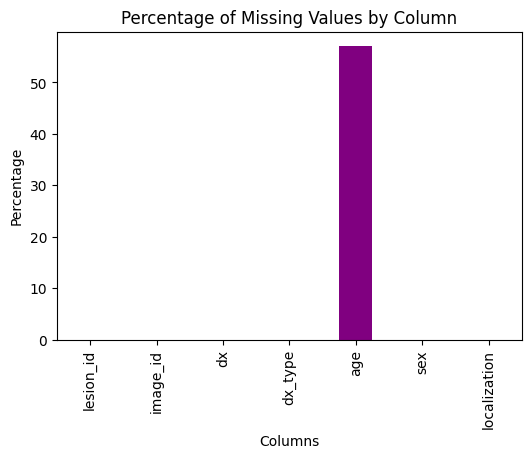

In [ ]:
missing_values = meta_data.isnull().sum()
print(missing_values)
missing_values_percentage = (missing_values)
plt.figure(figsize=(6, 4))
missing_values_percentage.plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

In [ ]:
categorical_columns = ['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization']
numerical_columns = ['age']

In [ ]:
for column in categorical_columns:
    meta_data['localization'].value_counts()

meta_data['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

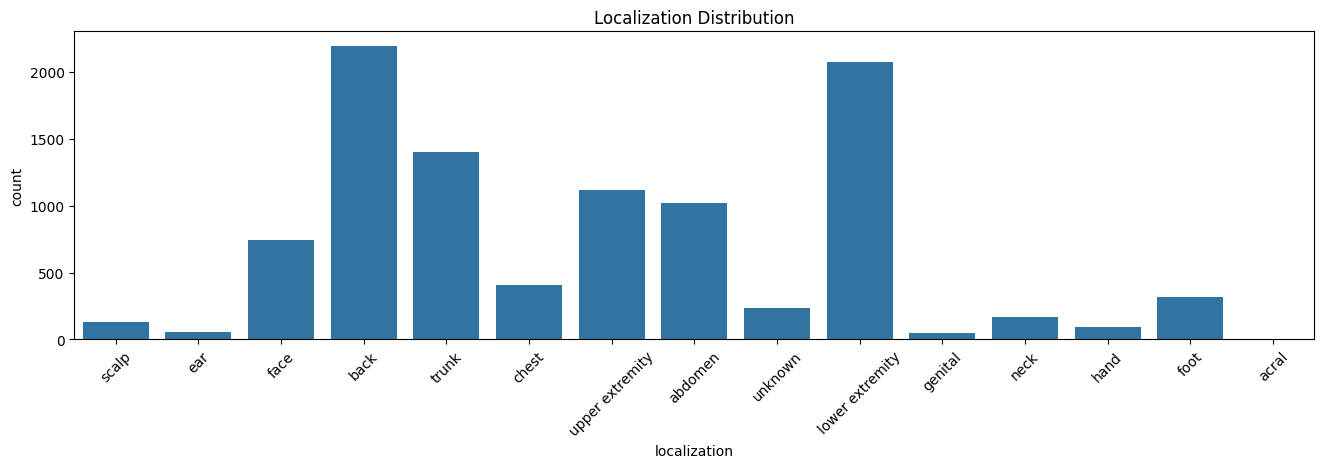

In [ ]:
plt.figure(figsize=(16, 4))
sns.countplot(data=meta_data, x='localization')
plt.title('Localization Distribution')
plt.xticks(rotation=45)
plt.show()

Majority of the skin conditions that exist in the dataset are located on the back

In [ ]:
for column in categorical_columns:
    meta_data['sex'].value_counts()

meta_data['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

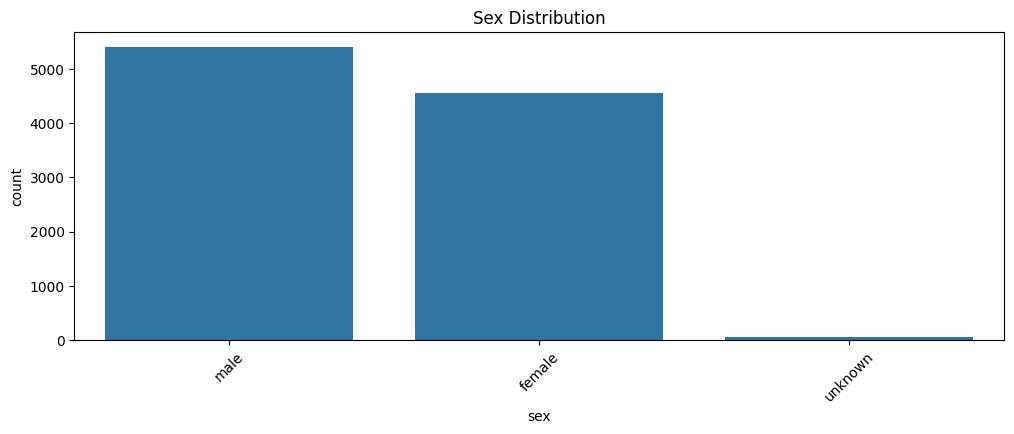

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='sex')
plt.title('Sex Distribution')
plt.xticks(rotation=45)
plt.show()

There are more males in the dataset, than females, and unknown gender

In [ ]:
for column in categorical_columns:
    meta_data['dx'].value_counts()

meta_data['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

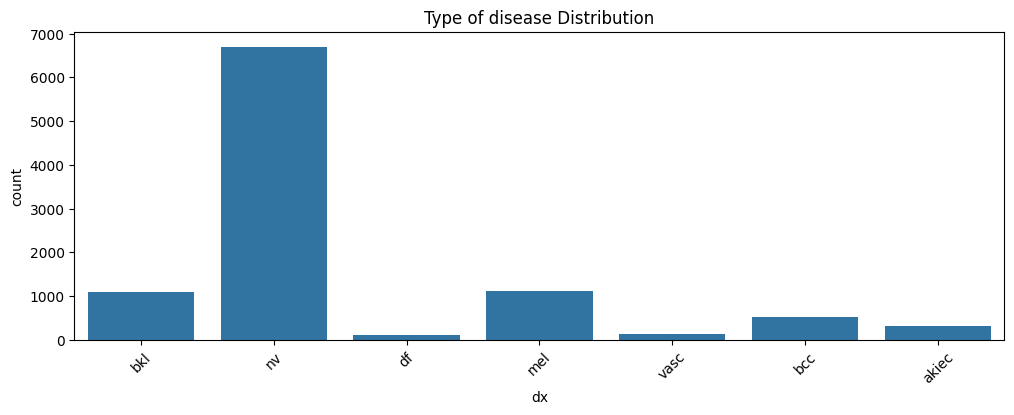

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

The skin condition that is more prevalent in the dataset is the melanocytic nevi

In [ ]:
for column in categorical_columns:
    meta_data['dx_type'].value_counts()

meta_data['dx_type'].value_counts()

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

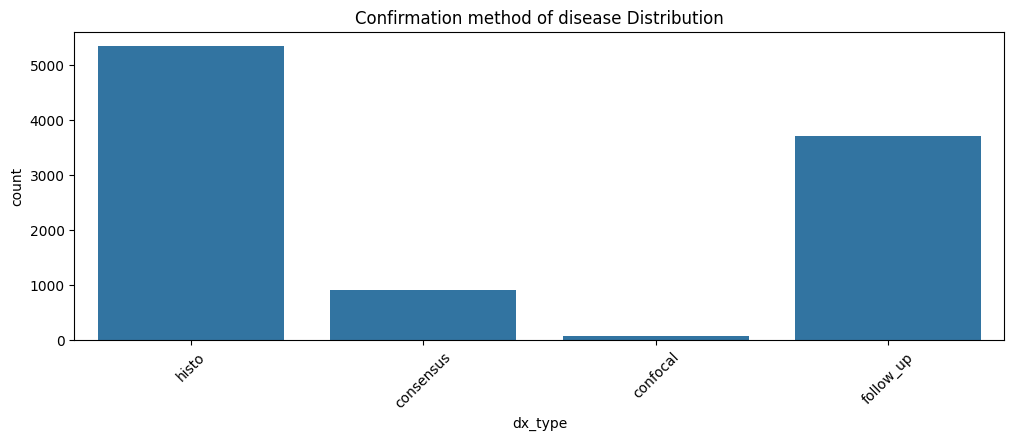

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type')
plt.title('Confirmation method of disease Distribution')
plt.xticks(rotation=45)
plt.show()

Most conditions are confirmed through histopathology (histo), secondandly through follow-up examination (follow_up), thirdly through expert consensus (consensus), and lastly through in-vivo confocal microscopy (confocal)

In [ ]:
for column in numerical_columns:
    print(f"\nValue counts for {column}:")
    print(meta_data[column].value_counts(dropna=False))  # Include NaN in counts


Value counts for age:
age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
NaN       57
10.0      41
0.0       39
Name: count, dtype: int64


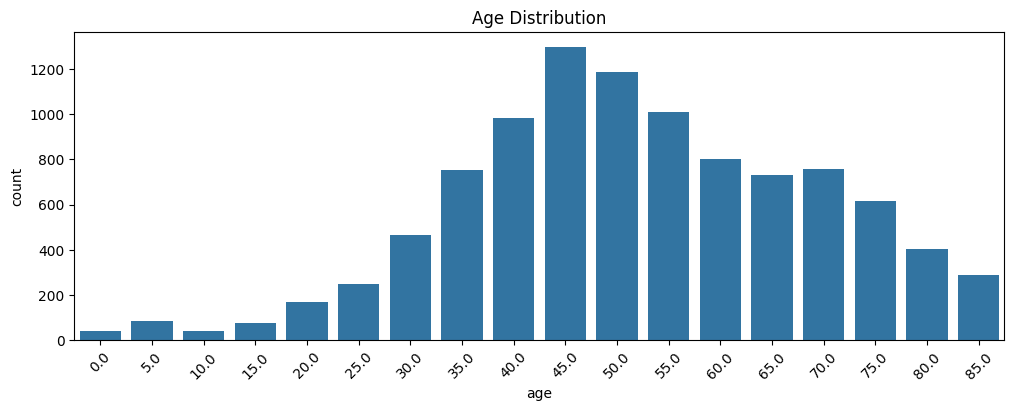

In [ ]:
# Distribution of Age in pictorial format
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

The most prominent age in the dataset, is 45

# Explaratpry Data Analysis for Relationship among variables

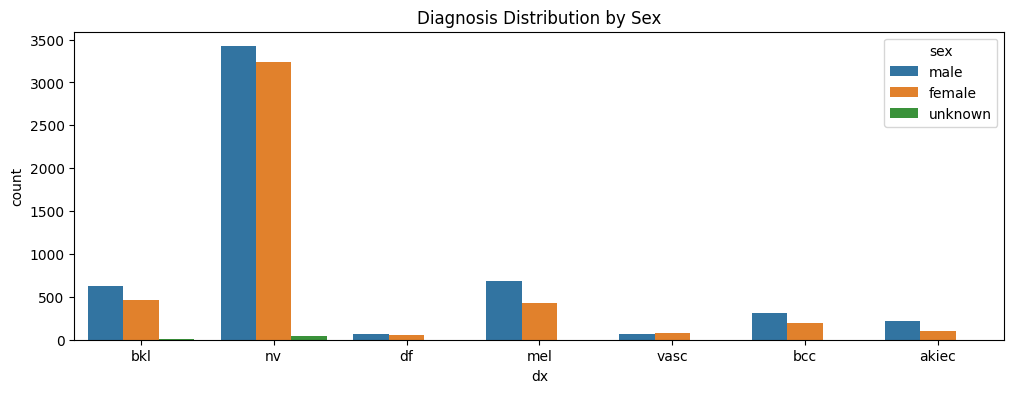

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx', hue='sex')
plt.title('Diagnosis Distribution by Sex')
plt.show()

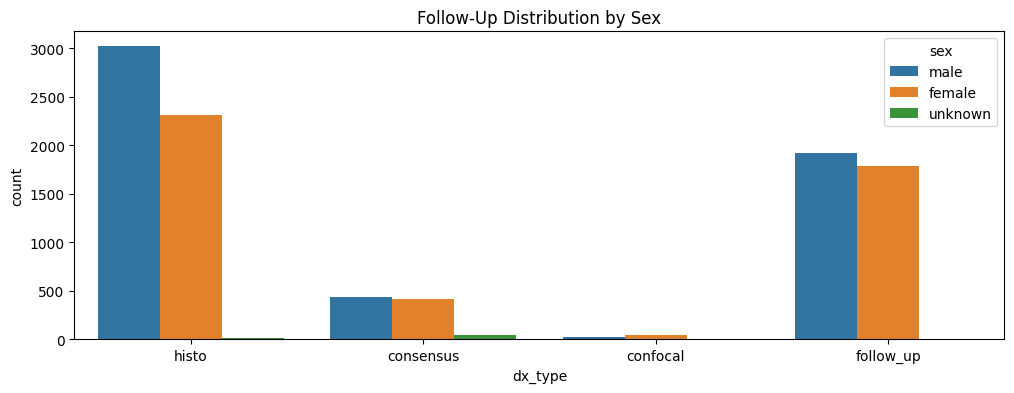

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type', hue='sex')
plt.title('Follow-Up Distribution by Sex')
plt.show()

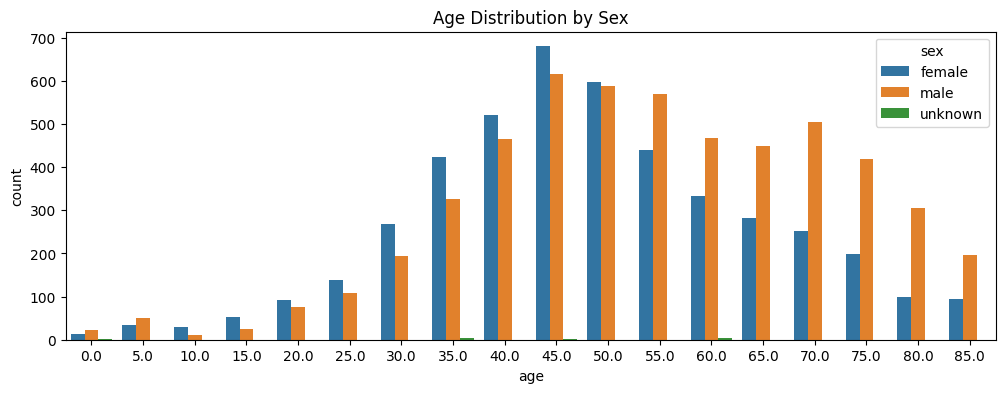

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='sex')
plt.title('Age Distribution by Sex')
plt.show()

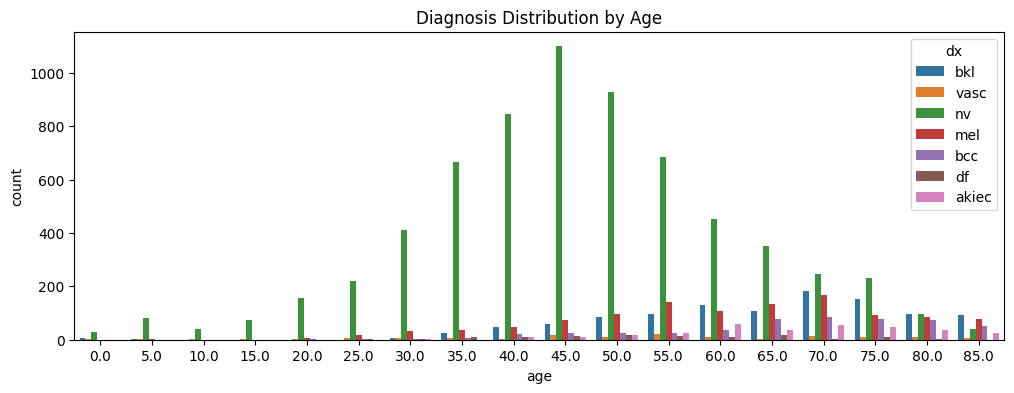

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx')
plt.title('Diagnosis Distribution by Age')
plt.show()

nv is the most dominant disease amongst all the ages

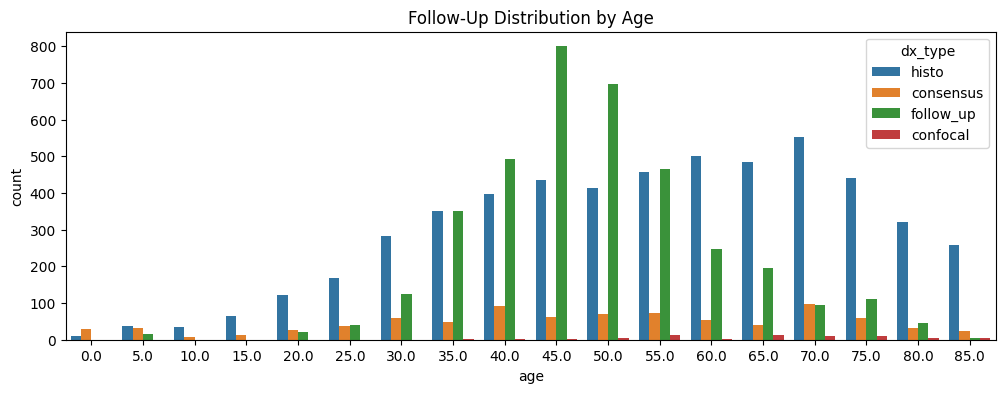

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx_type')
plt.title('Follow-Up Distribution by Age')
plt.show()

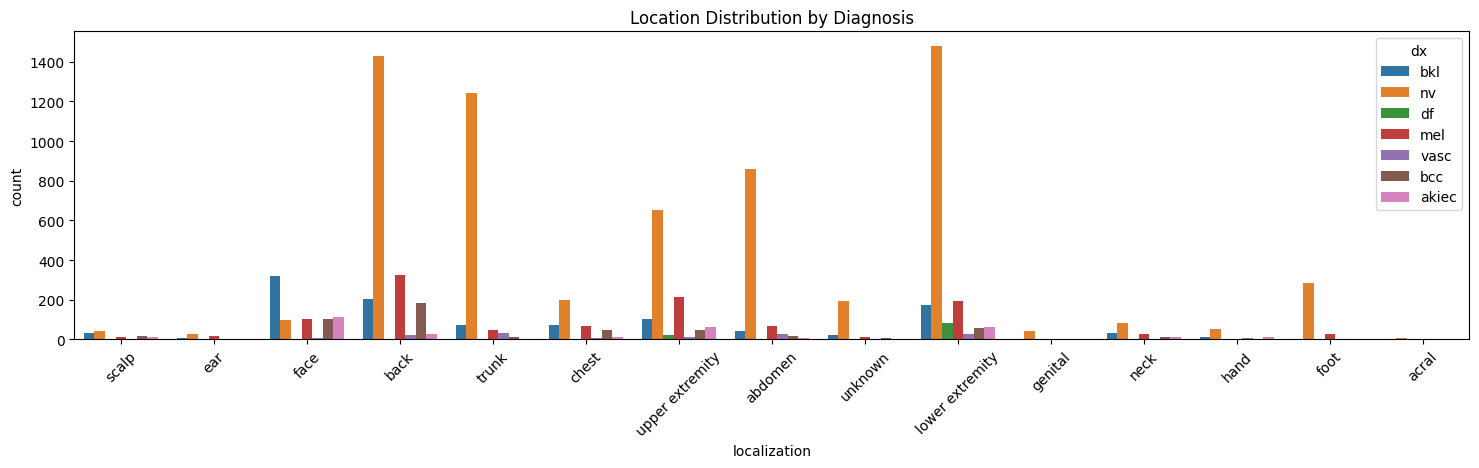

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx')
plt.title('Location Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

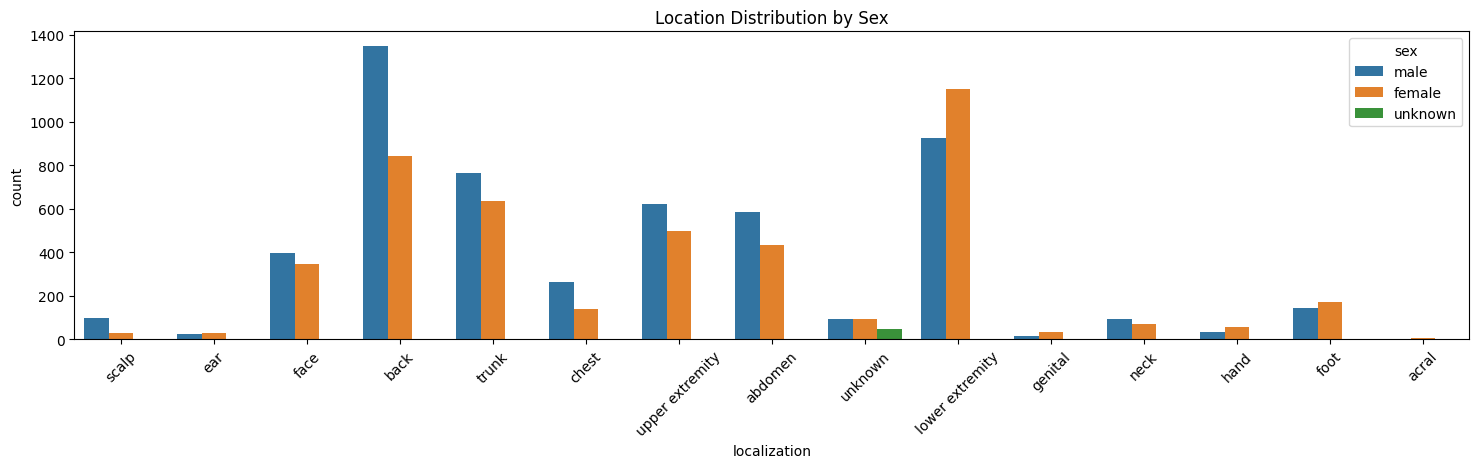

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='sex')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

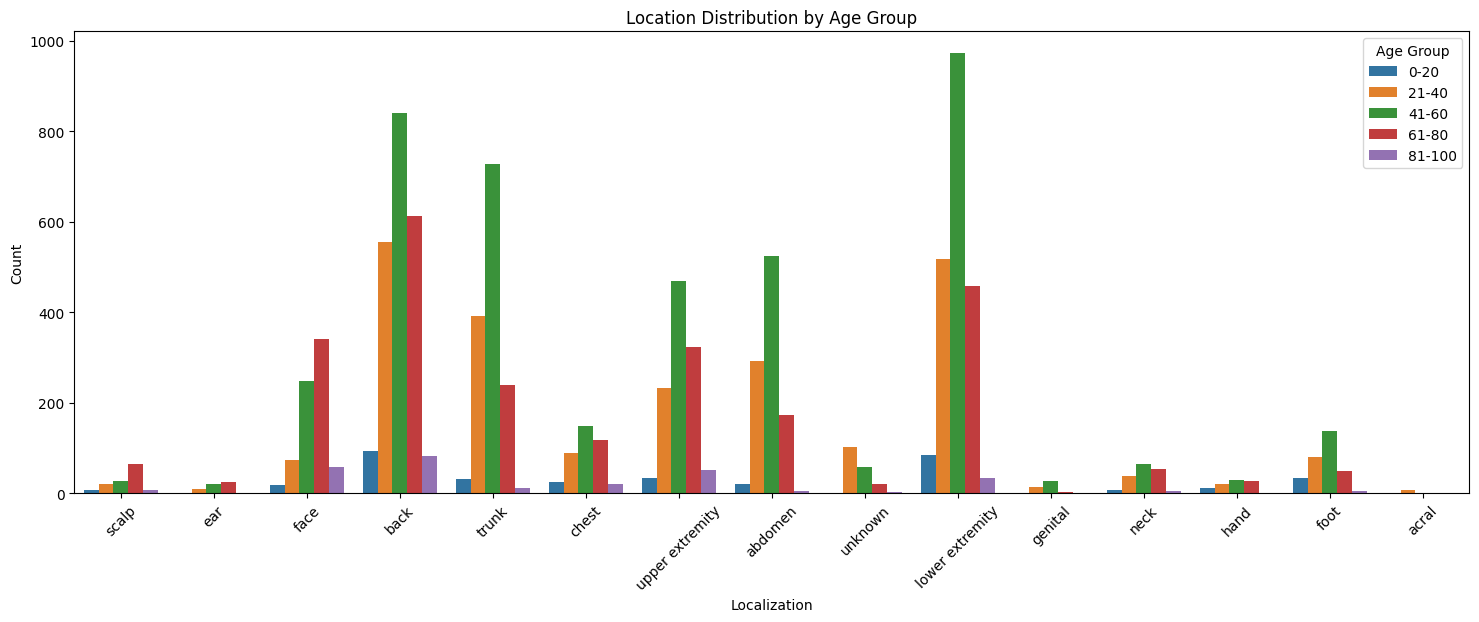

In [ ]:
age_groups = pd.cut(meta_data['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

meta_data['age_group'] = age_groups
plt.figure(figsize=(18, 6))
sns.countplot(data=meta_data, x='localization', hue='age_group')
plt.title('Location Distribution by Age Group')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

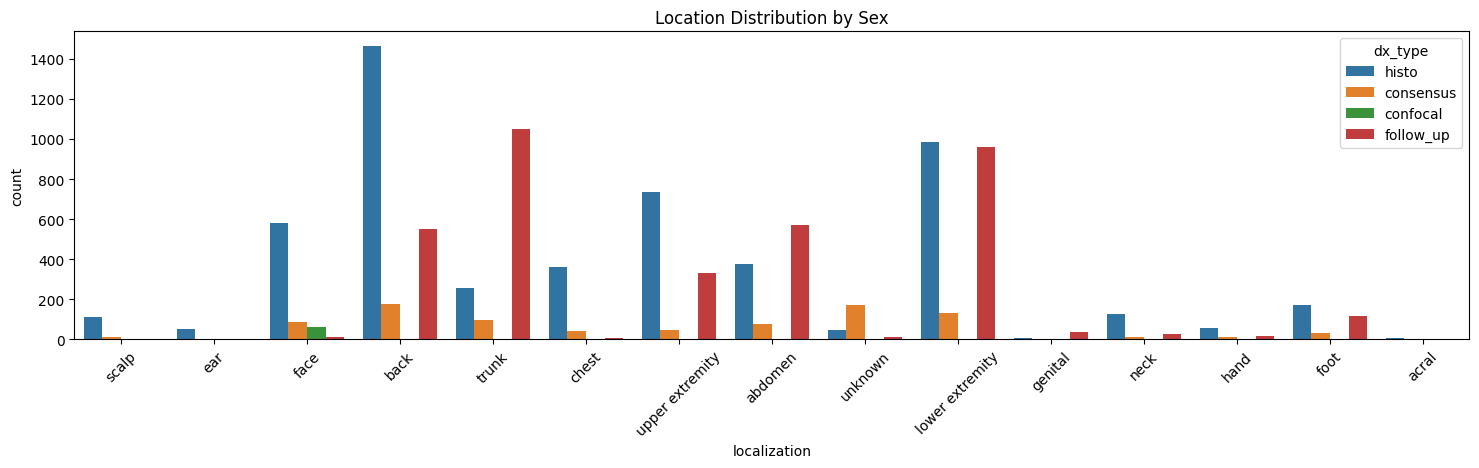

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx_type')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

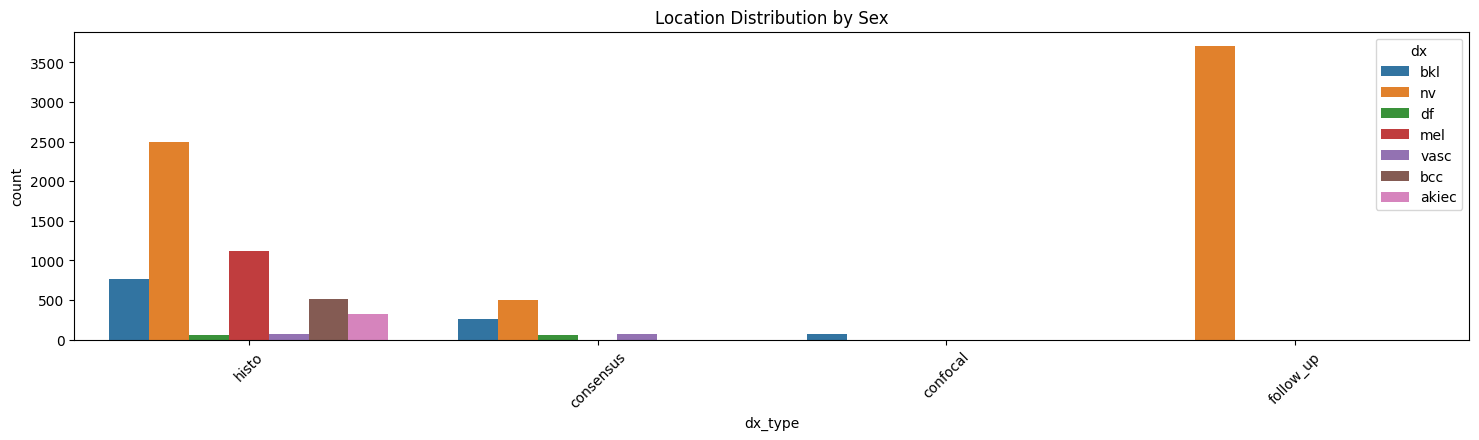

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='dx_type', hue='dx')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

# DATA PREPROCESSING

Step 1: Data cleansing involves identifying and correcting errors or inconsistencies in the data.

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lesion_id     10015 non-null  object  
 1   image_id      10015 non-null  object  
 2   dx            10015 non-null  object  
 3   dx_type       10015 non-null  object  
 4   age           9958 non-null   float64 
 5   sex           10015 non-null  object  
 6   localization  10015 non-null  object  
 7   age_group     9919 non-null   category
dtypes: category(1), float64(1), object(6)
memory usage: 557.8+ KB


In [ ]:
meta_data.head()

lesion_id      image_id   dx dx_type   age   sex localization age_group
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp     61-80
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp     61-80
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp     61-80
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp     61-80
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear     61-80

In [ ]:
meta_data = meta_data.drop_duplicates()
meta_data = meta_data.drop(columns=['age_group'])

In [ ]:
from sklearn.impute import KNNImputer

columns_for_imputation = ['age']
impute_data = meta_data[columns_for_imputation]

imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(impute_data)

meta_data['age'] = imputed_data[:, 0]

meta_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

#Handle Missing Entries using the median
# Replace missing values in 'age' column with median age
median_age = meta_data['age'].median()
meta_data['age'] = meta_data['age'].fillna(median_age)

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
meta_data['age']

0        80.0
1        80.0
2        80.0
3        80.0
4        75.0
         ... 
10010    40.0
10011    40.0
10012    40.0
10013    80.0
10014    70.0
Name: age, Length: 10015, dtype: float64

Fixing column names

In [ ]:
meta_data = meta_data.rename(columns={
    'lesion_id': 'Lesion_Id',
    'image_id': 'Image_Id',
    'dx': 'Diagnosis',
    'dx_type': 'Confirmation_Method',
    'age': 'Age',
    'sex': 'Sex',
    'localization': 'Region_Of_Disease'
})

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lesion_Id            10015 non-null  object 
 1   Image_Id             10015 non-null  object 
 2   Diagnosis            10015 non-null  object 
 3   Confirmation_Method  10015 non-null  object 
 4   Age                  10015 non-null  float64
 5   Sex                  10015 non-null  object 
 6   Region_Of_Disease    10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
diagnosis_mapping = {
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis-Like Lesions',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic Nevi'
}

meta_data['Updated_Diagnosis'] = meta_data['Diagnosis'].map(diagnosis_mapping)

In [ ]:
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method   Age   Sex  \
0  HAM_0000118  ISIC_0027419       bkl               histo  80.0  male   
1  HAM_0000118  ISIC_0025030       bkl               histo  80.0  male   
2  HAM_0002730  ISIC_0026769       bkl               histo  80.0  male   
3  HAM_0002730  ISIC_0025661       bkl               histo  80.0  male   
4  HAM_0001466  ISIC_0031633       bkl               histo  75.0  male   

  Region_Of_Disease              Updated_Diagnosis  
0             scalp  Benign Keratosis-Like Lesions  
1             scalp  Benign Keratosis-Like Lesions  
2             scalp  Benign Keratosis-Like Lesions  
3             scalp  Benign Keratosis-Like Lesions  
4               ear  Benign Keratosis-Like Lesions

In [ ]:
meta_data['Age'] = meta_data['Age'].astype(int)

In [ ]:
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age   Sex  \
0  HAM_0000118  ISIC_0027419       bkl               histo   80  male   
1  HAM_0000118  ISIC_0025030       bkl               histo   80  male   
2  HAM_0002730  ISIC_0026769       bkl               histo   80  male   
3  HAM_0002730  ISIC_0025661       bkl               histo   80  male   
4  HAM_0001466  ISIC_0031633       bkl               histo   75  male   

  Region_Of_Disease              Updated_Diagnosis  
0             scalp  Benign Keratosis-Like Lesions  
1             scalp  Benign Keratosis-Like Lesions  
2             scalp  Benign Keratosis-Like Lesions  
3             scalp  Benign Keratosis-Like Lesions  
4               ear  Benign Keratosis-Like Lesions

In [ ]:
meta_data.isna().sum()

Lesion_Id              0
Image_Id               0
Diagnosis              0
Confirmation_Method    0
Age                    0
Sex                    0
Region_Of_Disease      0
Updated_Diagnosis      0
dtype: int64

# PreProcessing Complete

In [ ]:
image_path1='/content/Skin/HAM10000_images_part_1'
image_path2='/content/Skin/HAM10000_images_part_2'

In [ ]:
final_image_dataset = '/content/Skin'

In [ ]:
import os
import shutil
if not os.path.exists(final_image_dataset):
    os.makedirs(final_image_dataset)

for filename in os.listdir(image_path1):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        shutil.copy(os.path.join(image_path1, filename), final_image_dataset)

for filename in os.listdir(image_path2):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        shutil.copy(os.path.join(image_path2, filename), final_image_dataset)

In [ ]:
meta_data['Image_path'] = meta_data['Image_Id'].apply(lambda x: os.path.join(final_image_dataset, f"{x}.jpg"))

In [ ]:
meta_data

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0      HAM_0000118  ISIC_0027419       bkl               histo   80    male   
1      HAM_0000118  ISIC_0025030       bkl               histo   80    male   
2      HAM_0002730  ISIC_0026769       bkl               histo   80    male   
3      HAM_0002730  ISIC_0025661       bkl               histo   80    male   
4      HAM_0001466  ISIC_0031633       bkl               histo   75    male   
...            ...           ...       ...                 ...  ...     ...   
10010  HAM_0002867  ISIC_0033084     akiec               histo   40    male   
10011  HAM_0002867  ISIC_0033550     akiec               histo   40    male   
10012  HAM_0002867  ISIC_0033536     akiec               histo   40    male   
10013  HAM_0000239  ISIC_0032854     akiec               histo   80    male   
10014  HAM_0003521  ISIC_0032258       mel               histo   70  female   

      Region_Of_Disease              Updated_Diagnosis  \
0                 scalp  Benign Keratosis-Like Lesions   
1                 scalp  Benign Keratosis-Like Lesions   
2                 scalp  Benign Keratosis-Like Lesions   
3                 scalp  Benign Keratosis-Like Lesions   
4                   ear  Benign Keratosis-Like Lesions   
...                 ...                            ...   
10010           abdomen              Actinic Keratoses   
10011           abdomen              Actinic Keratoses   
10012           abdomen              Actinic Keratoses   
10013              face              Actinic Keratoses   
10014              back                       Melanoma   

                           Image_path  
0      /content/Skin/ISIC_0027419.jpg  
1      /content/Skin/ISIC_0025030.jpg  
2      /content/Skin/ISIC_0026769.jpg  
3      /content/Skin/ISIC_0025661.jpg  
4      /content/Skin/ISIC_0031633.jpg  
...                               ...  
10010  /content/Skin/ISIC_0033084.jpg  
10011  /content/Skin/ISIC_0033550.jpg  
10012  /content/Skin/ISIC_0033536.jpg  
10013  /content/Skin/ISIC_0032854.jpg  
10014  /content/Skin/ISIC_0032258.jpg  

[10015 rows x 9 columns]

# Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
meta_data['Updated_Diagnosis_Label'] = label_encoder.fit_transform(meta_data['Updated_Diagnosis'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'Actinic Keratoses': 0, 'Basal Cell Carcinoma': 1, 'Benign Keratosis-Like Lesions': 2, 'Dermatofibroma': 3, 'Melanocytic Nevi': 4, 'Melanoma': 5, 'Vascular Lesions': 6}


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Lesion_Id                10015 non-null  object
 1   Image_Id                 10015 non-null  object
 2   Diagnosis                10015 non-null  object
 3   Confirmation_Method      10015 non-null  object
 4   Age                      10015 non-null  int64 
 5   Sex                      10015 non-null  object
 6   Region_Of_Disease        10015 non-null  object
 7   Updated_Diagnosis        10015 non-null  object
 8   Image_path               10015 non-null  object
 9   Updated_Diagnosis_Label  10015 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 782.5+ KB


In [ ]:
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age   Sex  \
0  HAM_0000118  ISIC_0027419       bkl               histo   80  male   
1  HAM_0000118  ISIC_0025030       bkl               histo   80  male   
2  HAM_0002730  ISIC_0026769       bkl               histo   80  male   
3  HAM_0002730  ISIC_0025661       bkl               histo   80  male   
4  HAM_0001466  ISIC_0031633       bkl               histo   75  male   

  Region_Of_Disease              Updated_Diagnosis  \
0             scalp  Benign Keratosis-Like Lesions   
1             scalp  Benign Keratosis-Like Lesions   
2             scalp  Benign Keratosis-Like Lesions   
3             scalp  Benign Keratosis-Like Lesions   
4               ear  Benign Keratosis-Like Lesions   

                       Image_path  Updated_Diagnosis_Label  
0  /content/Skin/ISIC_0027419.jpg                        2  
1  /content/Skin/ISIC_0025030.jpg                        2  
2  /content/Skin/ISIC_0026769.jpg                        2  
3  /content/Skin/ISIC_0025661.jpg                        2  
4  /content/Skin/ISIC_0031633.jpg                        2

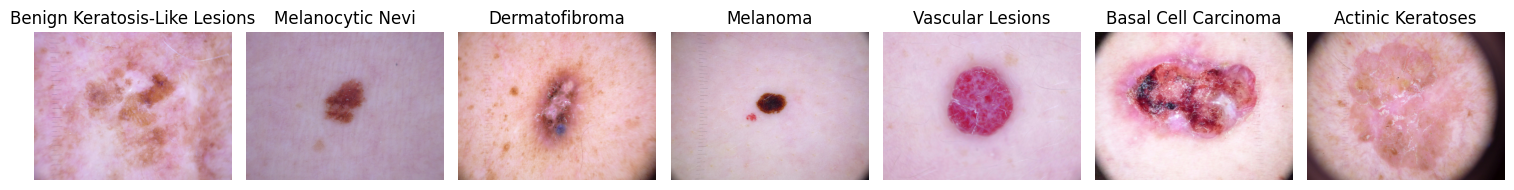

In [ ]:
for i in range(len(meta_data)):
    if not os.path.isfile(meta_data['Image_path'].iloc[i]):
        raise FileNotFoundError(f"Image file not found: {meta_data['Image_path'].iloc[i]}")

class_images = meta_data.drop_duplicates(subset='Updated_Diagnosis')

def plot_class_images(class_images):
    plt.figure(figsize=(15, 5))
    num_classes = len(class_images)
    for i in range(num_classes):
        plt.subplot(1, num_classes, i + 1)
        img = plt.imread(class_images['Image_path'].iloc[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_images['Updated_Diagnosis'].iloc[i], fontsize=12)
    plt.tight_layout()
    plt.show()

plot_class_images(class_images)

In [ ]:
meta_data['Updated_Diagnosis'].unique()

array(['Benign Keratosis-Like Lesions', 'Melanocytic Nevi',
       'Dermatofibroma', 'Melanoma', 'Vascular Lesions',
       'Basal Cell Carcinoma', 'Actinic Keratoses'], dtype=object)

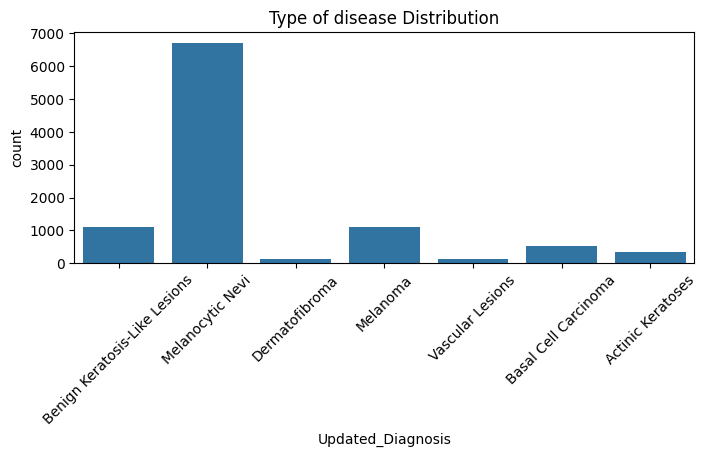

In [ ]:
plt.figure(figsize=(8, 3))
sns.countplot(data=meta_data, x='Updated_Diagnosis')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

# Augment and Balance classes

In [ ]:
pip install imgaug opencv-python

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import imgaug.augmenters as iaa
from sklearn.model_selection import train_test_split
from skimage import io

In [ ]:
import os
import pandas as pd
from skimage import io
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

aug_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip with probability 0.5
    iaa.Affine(rotate=(-10, 10)),  # Random rotation within -10 to 10 degrees
    iaa.Affine(scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}),  # Random scaling within 90% to 110%
    iaa.Affine(shear=(-5, 5)),  # Random shear within -5 to 5 degrees
    iaa.GaussianBlur(sigma=(0, 0.5)),  # Gaussian blur with a small sigma
    iaa.AdditiveGaussianNoise(scale=(0, 0.01*255)),  # Small additive Gaussian noise
    iaa.ContrastNormalization((0.9, 1.1)),  # Slightly change contrast
    iaa.CLAHE(clip_limit=(1, 2))  # Apply CLAHE with a moderate clip limit
])

augmented_images_dir = '/path/to/augmented_images'
os.makedirs(augmented_images_dir, exist_ok=True)

class_counts = meta_data['Diagnosis'].value_counts()
max_count = class_counts.max()
balanced_samples = []

for label in class_counts.index:
    class_subset = meta_data[meta_data['Diagnosis'] == label]

    if len(class_subset) < max_count:
        n_augmentations = max_count - len(class_subset)
        augmented_samples = []
        for i in range(n_augmentations):
            sample = class_subset.sample(n=1, random_state=42).iloc[0]
            img_path = sample['Image_path']
            img = io.imread(img_path)
            augmented_image = aug_pipeline(image=img)


            augmented_image_path = os.path.join(augmented_images_dir, f'{label}_augmented_{i}.jpg')
            io.imsave(augmented_image_path, augmented_image)


            augmented_sample = sample.copy()
            augmented_sample['Image_path'] = augmented_image_path
            augmented_samples.append(augmented_sample)

        augmented_df = pd.DataFrame(augmented_samples)
        class_oversampled = pd.concat([class_subset, augmented_df], ignore_index=True)
    else:
        class_oversampled = class_subset

    balanced_samples.append(class_oversampled)

balanced_dataset = pd.concat(balanced_samples).reset_index(drop=True)

print("Dataset balanced successfully!")

Dataset balanced successfully!


In [ ]:
meta_data = balanced_dataset
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0  HAM_0001751  ISIC_0024698        nv           consensus   70    male   
1  HAM_0000559  ISIC_0024693        nv           follow_up   45  female   
2  HAM_0004932  ISIC_0032212        nv           follow_up   45  female   
3  HAM_0004516  ISIC_0025775        nv           follow_up   45  female   
4  HAM_0006510  ISIC_0029828        nv           follow_up   55  female   

  Region_Of_Disease Updated_Diagnosis                      Image_path  \
0              face  Melanocytic Nevi  /content/Skin/ISIC_0024698.jpg   
1   upper extremity  Melanocytic Nevi  /content/Skin/ISIC_0024693.jpg   
2              foot  Melanocytic Nevi  /content/Skin/ISIC_0032212.jpg   
3              neck  Melanocytic Nevi  /content/Skin/ISIC_0025775.jpg   
4   lower extremity  Melanocytic Nevi  /content/Skin/ISIC_0029828.jpg   

   Updated_Diagnosis_Label  
0                        4  
1                        4  
2                        4  
3                        4  
4                        4

In [ ]:
meta_data['Updated_Diagnosis'].unique()

array(['Melanocytic Nevi', 'Melanoma', 'Benign Keratosis-Like Lesions',
       'Basal Cell Carcinoma', 'Actinic Keratoses', 'Vascular Lesions',
       'Dermatofibroma'], dtype=object)

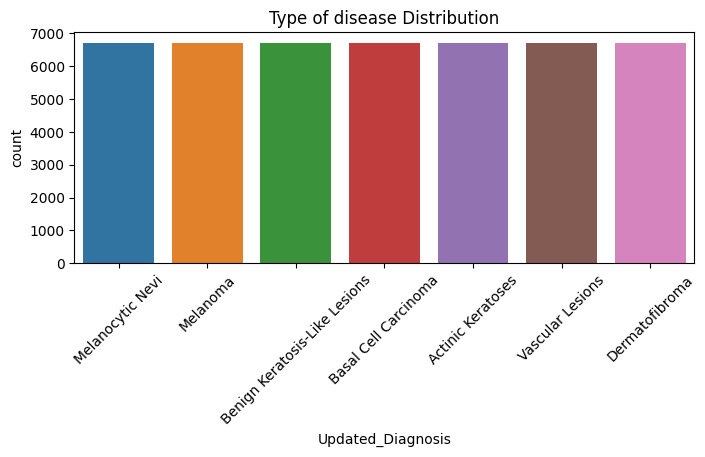

In [ ]:
plt.figure(figsize=(8, 3))
sns.countplot(data=meta_data, x='Updated_Diagnosis')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

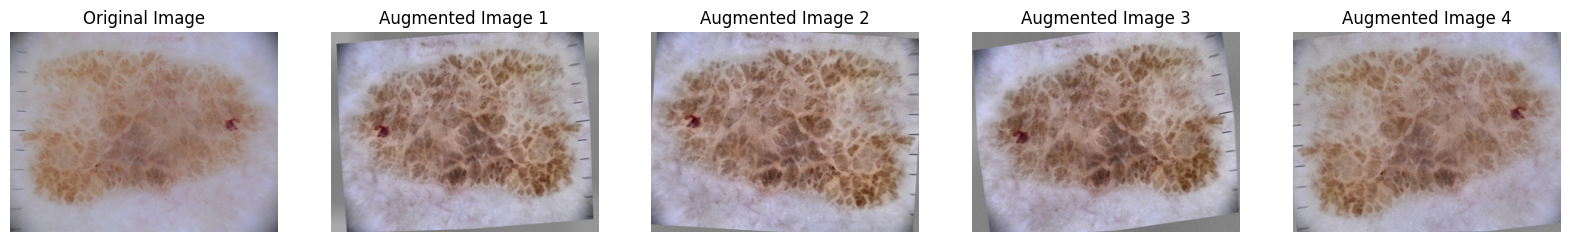

In [ ]:
import imgaug.augmenters as iaa
import imageio
image = imageio.imread('/kaggle/working/skin-cancer-mnist-ham10000/ISIC_0024471.jpg')

mean_pixel_value = int(np.mean(image))

augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip with probability 0.5
    iaa.Affine(rotate=(-10, 10), cval=mean_pixel_value),  # Random rotation within -10 to 10 degrees
    iaa.Affine(scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}, cval=mean_pixel_value),  # Random scaling within 90% to 110%
    iaa.Affine(shear=(-5, 5), cval=mean_pixel_value),  # Random shear within -5 to 5 degrees
    iaa.GaussianBlur(sigma=(0, 0.5)),  # Gaussian blur with a small sigma
    iaa.AdditiveGaussianNoise(scale=(0, 0.01*255)),  # Small additive Gaussian noise
    iaa.ContrastNormalization((0.9, 1.1)),  # Slightly change contrast
    iaa.CLAHE(clip_limit=(1, 2))  # Apply CLAHE with a moderate clip limit
])

augmented_images = [augmentation_pipeline(image=image) for _ in range(4)]

fig, axes = plt.subplots(1, 5, figsize=(20, 10))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, aug_img in enumerate(augmented_images):
    axes[i+1].imshow(aug_img)
    axes[i+1].set_title(f'Augmented Image {i+1}')
    axes[i+1].axis('off')

plt.show()

# Split

In [ ]:
X = meta_data.drop(columns=['Updated_Diagnosis_Label'])
y = meta_data['Updated_Diagnosis_Label']

print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (46935, 9)
Shape of target variable (y): (46935,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # 7:2:1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.8, 1.2],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

Found 30038 validated image filenames belonging to 7 classes.
Found 7510 validated image filenames belonging to 7 classes.
Found 9387 validated image filenames belonging to 7 classes.


# DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

base_model =DenseNet201(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
            metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
class_counts = meta_data['Updated_Diagnosis_Label'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 7.0, 1: 7.0, 2: 7.0, 3: 7.0, 4: 7.0, 5: 7.0, 6: 7.0}


In [ ]:
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
history=model.fit(
    train_generator,
    epochs=10,
    batch_size=100,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/10


I0000 00:00:1724813526.252674      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724813526.372207      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/301 ━━━━━━━━━━━━━━━━━━━━ 2:10 2s/step - accuracy: 0.8334 - loss: 1.4767

W0000 00:00:1724813955.208318      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8501 - loss: 1.3135

W0000 00:00:1724814081.260823      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724814136.858989      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


301/301 ━━━━━━━━━━━━━━━━━━━━ 710s 2s/step - accuracy: 0.8503 - loss: 1.3115 - val_accuracy: 0.9325 - val_loss: 0.3219 - learning_rate: 0.0010
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - accuracy: 0.9322 - loss: 0.3227 - val_accuracy: 0.9361 - val_loss: 0.2659 - learning_rate: 0.0010
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 542s 2s/step - accuracy: 0.9322 - loss: 0.2901 - val_accuracy: 0.9360 - val_loss: 0.2602 - learning_rate: 0.0010
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 540s 2s/step - accuracy: 0.9342 - loss: 0.2898 - val_accuracy: 0.9330 - val_loss: 0.2647 - learning_rate: 0.0010
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 540s 2s/step - accuracy: 0.9326 - loss: 0.2844 - val_accuracy: 0.9328 - val_loss: 0.2626 - learning_rate: 0.0010
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - accuracy: 0.9401 - loss: 0.2509 - val_accuracy: 0.9378 - val_loss: 0.2255 - learning_rate: 1.0000e-04
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - accuracy: 0.9406 - loss: 0.2315 - 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error

predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')
mse = mean_squared_error(true_classes, predicted_classes)
bias = (np.mean(predicted_classes) - np.mean(true_classes)) ** 2
variance = np.var(predicted_classes)


print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Bias: {bias:.2f}")

 1/94 ━━━━━━━━━━━━━━━━━━━━ 29:10 19s/step

W0000 00:00:1724819026.889891      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


94/94 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step


W0000 00:00:1724819125.376445      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Accuracy: 0.94
Sensitivity: 1.00
Specificity: 0.99
Precision: 0.95
F1-Score: 0.94
AUC: 1.00
Mean Squared Error: 0.27
Variance: 3.90
Bias: 0.00


94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 389ms/step


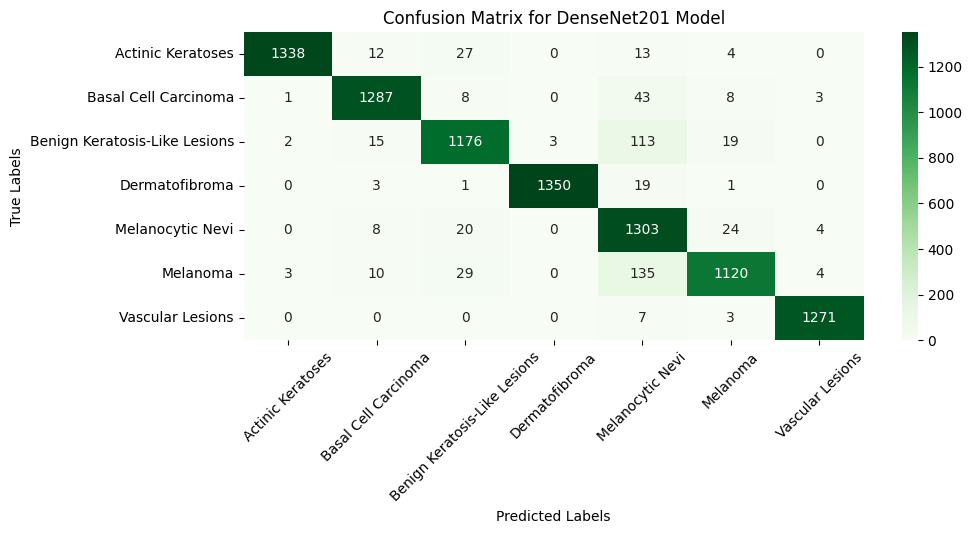

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for DenseNet201 Model')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Recreate the confusion matrix as a NumPy array
confusion_matrix = np.array([
    [1338, 12, 27, 0, 13, 4, 0],
    [1, 1287, 8, 0, 43, 8, 3],
    [2, 15, 1176, 3, 113, 19, 0],
    [0, 3, 1, 1350, 19, 1, 0],
    [0, 8, 20, 0, 1303, 24, 4],
    [3, 10, 29, 0, 135, 1120, 4],
    [0, 0, 0, 0, 7, 3, 1271]
])

# True labels and predicted labels (repeated for the sake of demonstration)
true_labels = np.array([
    'Actinic Keratoses', 'Basal Cell Carcinoma', 'Benign Keratosis-Like Lesions',
    'Dermatofibroma', 'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions'
])

# Convert confusion matrix to true and predicted values
y_true = []
y_pred = []
for i, row in enumerate(confusion_matrix):
    for j, value in enumerate(row):
        y_true.extend([true_labels[i]] * value)
        y_pred.extend([true_labels[j]] * value)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=true_labels)
print(report)


                               precision    recall  f1-score   support

            Actinic Keratoses       1.00      0.96      0.98      1394
         Basal Cell Carcinoma       0.96      0.95      0.96      1350
Benign Keratosis-Like Lesions       0.93      0.89      0.91      1328
               Dermatofibroma       1.00      0.98      0.99      1374
             Melanocytic Nevi       0.80      0.96      0.87      1359
                     Melanoma       0.95      0.86      0.90      1301
             Vascular Lesions       0.99      0.99      0.99      1281

                     accuracy                           0.94      9387
                    macro avg       0.95      0.94      0.94      9387
                 weighted avg       0.95      0.94      0.94      9387



94/94 ━━━━━━━━━━━━━━━━━━━━ 36s 383ms/step


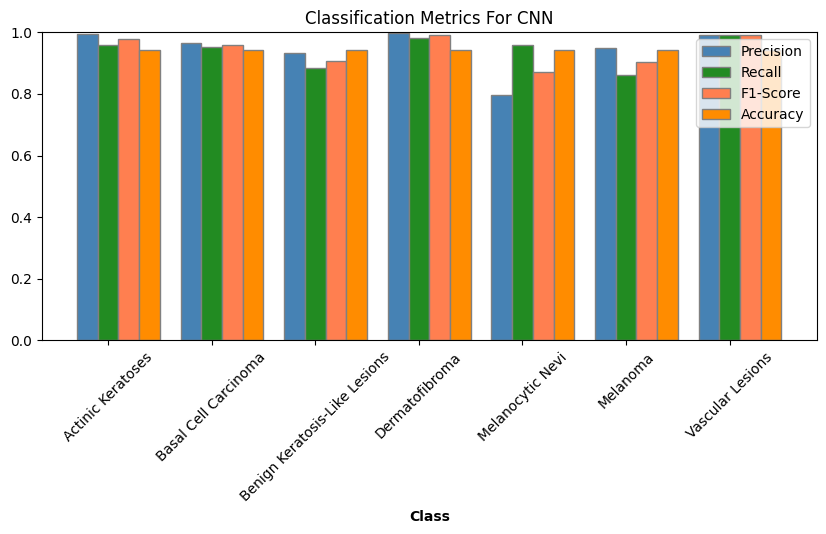

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

precision, recall, f1, _ = precision_recall_fscore_support(true_classes, predicted_classes)

accuracy = [accuracy_score(true_classes, predicted_classes) for _ in range(len(class_labels))]

plt.figure(figsize=(10, 4))

bar_width = 0.2
r1 = np.arange(len(class_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, precision, color='steelblue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='forestgreen', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1, color='coral', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='darkorange', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(class_labels))], class_labels, rotation=45)
plt.title('Classification Metrics For CNN')
plt.legend()
plt.ylim(0, 1)
plt.show()

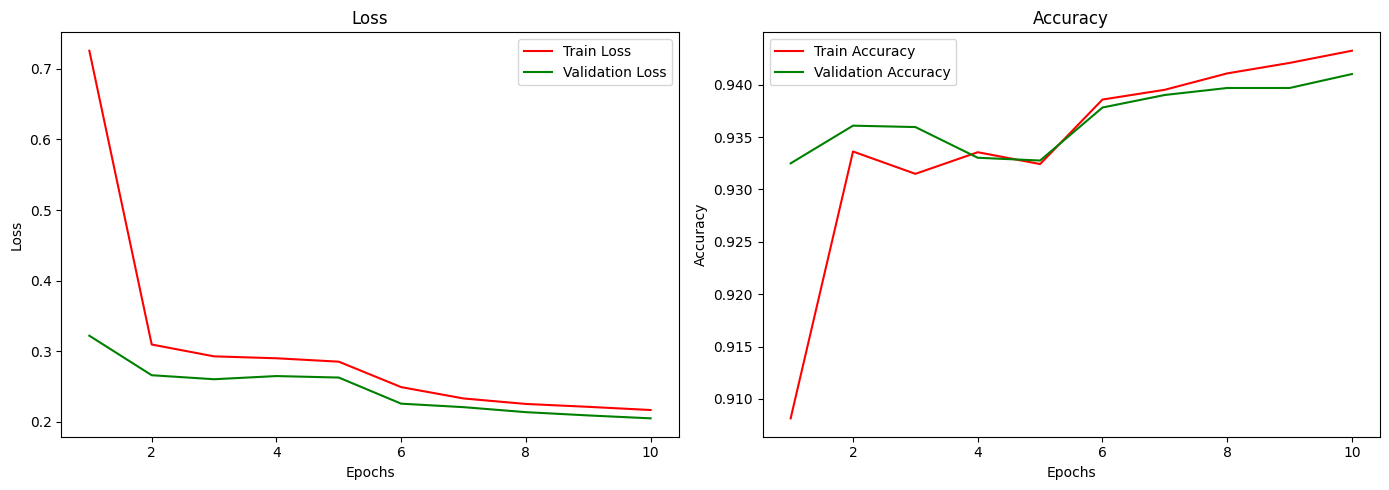

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

     Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0  HAM_0001751  ISIC_0024698        nv           consensus   70    male   
1  HAM_0000559  ISIC_0024693        nv           follow_up   45  female   
2  HAM_0004932  ISIC_0032212        nv           follow_up   45  female   
3  HAM_0004516  ISIC_0025775        nv           follow_up   45  female   
4  HAM_0006510  ISIC_0029828        nv           follow_up   55  female   

  Region_Of_Disease Updated_Diagnosis  \
0              face  Melanocytic Nevi   
1   upper extremity  Melanocytic Nevi   
2              foot  Melanocytic Nevi   
3              neck  Melanocytic Nevi   
4   lower extremity  Melanocytic Nevi   

                                          Image_path  Updated_Diagnosis_Label  
0  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
1  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
2  /kaggle/working/skin-cancer-mnist-ham10000/ISI...          

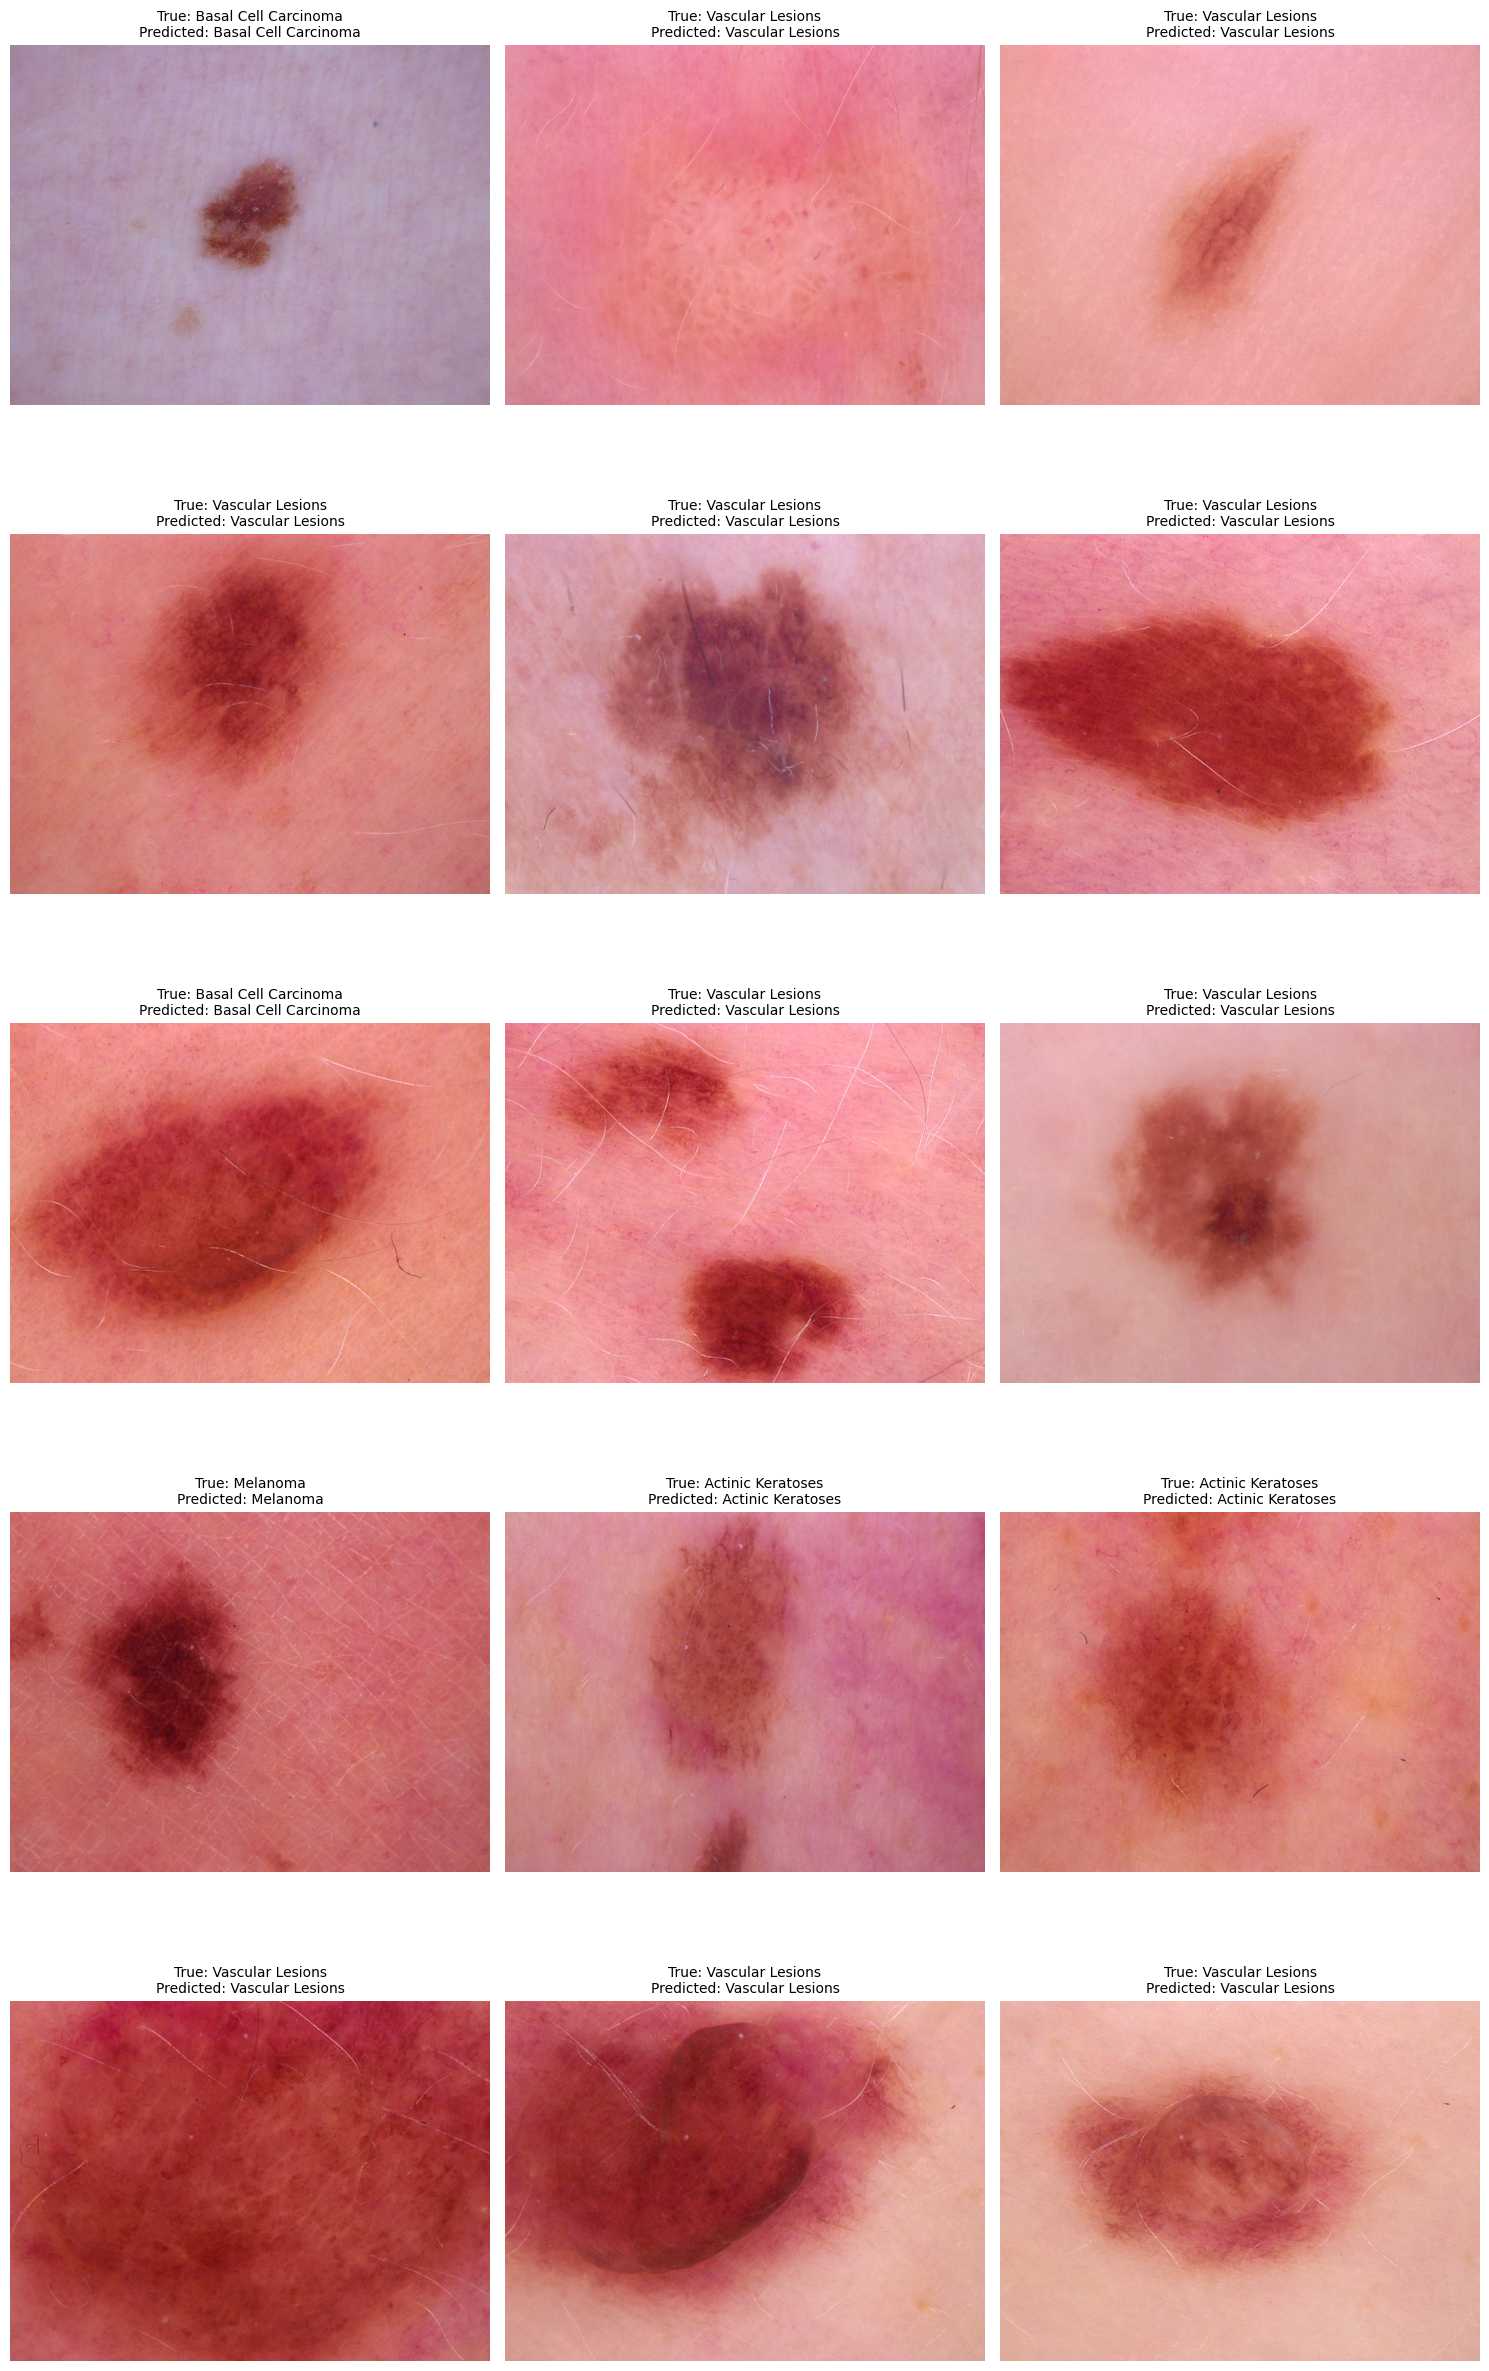

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(meta_data.head())

true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

class_labels = list(test_generator.class_indices.keys())

print(f"Length of true_labels: {len(true_labels)}")
print(f"Length of predicted_labels: {len(predicted_labels)}")
print(f"Length of meta_data: {len(meta_data)}")

if len(true_labels) > len(meta_data):
    raise ValueError("The number of true labels exceeds the number of rows in the meta_data DataFrame.")

meta_data = meta_data.iloc[:len(true_labels)]

meta_data['true_label'] = [class_labels[true_labels[i]] for i in range(len(true_labels))]
meta_data['predicted_label'] = [class_labels[predicted_labels[i]] for i in range(len(predicted_labels))]

plt.figure(figsize=(15, 25))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    img = plt.imread(meta_data['Image_path'].iloc[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {meta_data['true_label'].iloc[i]}\nPredicted: {meta_data['predicted_label'].iloc[i]}", fontsize=10)

plt.tight_layout()
plt.show()


# Saving the model

In [ ]:
model.save('Skin_disease_model.h5')